In [ ]:
!pip install phik

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From the min values it is evident that many variables have 0 value. The 0 values in these variables (except target variable) have substituted the null values.

# Identify null values

In [6]:
df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This means null values are overwritten with 0

# Fill NaN values

Substitute 0 with NaN in all columns except `Pregnancies` and `Outcome`

In [8]:
# obtain a list of column names
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [9]:
# column names to substitute 0 values
columns = list(df.columns)[1:-1]

# substitute 0 with NaN
df_copy = df.copy(deep=True)
df_copy[columns] = df_copy[columns].replace(0, np.NaN)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
# check for number of null values
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Having replaced 0s with NaN values, lets find all the relevant columns to train the model on.

# Correlation Matrix
Correlation matrix depicts the correlation a variable has with the others. The variables showing weak correlation with the `Outcome` column will be dropped from the dataset

To plot a correlation matrix in Python we will use the Phik library

interval columns not set, guessing: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


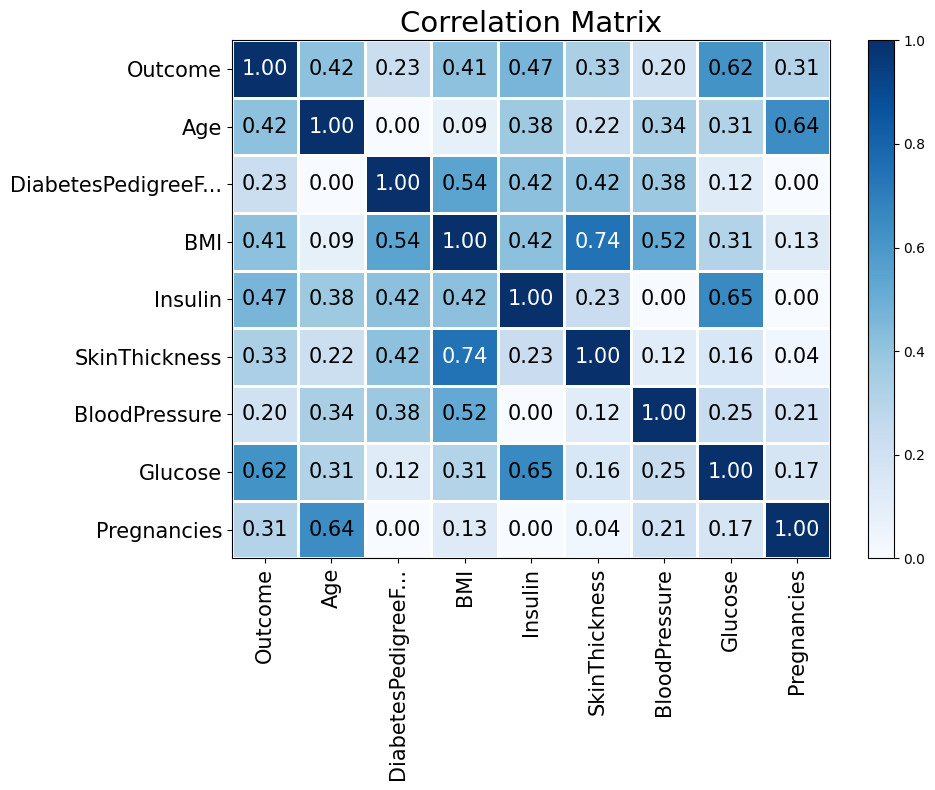

In [11]:
import phik
from phik.report import plot_correlation_matrix

corr_matrix = df_copy.phik_matrix()
plot_correlation_matrix(
    corr_matrix.values,
    x_labels = corr_matrix.columns,
    y_labels = corr_matrix.index,
    vmin = 0,
    vmax = 1,
    color_map = "Blues",
    title = "Correlation Matrix",
    fontsize_factor = 1.5,
    figsize = (10, 8)
)

In [12]:
drop_labels = ['DiabetesPedigreeFunction', 'SkinThickness', 'BloodPressure', 'Pregnancies']
df_final = df_copy.drop(labels=drop_labels, axis=1)
df_final.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,NaN,33.6,50,1
1,85.0,NaN,26.6,31,0
2,183.0,NaN,23.3,32,1
3,89.0,94.0,28.1,21,0
4,137.0,168.0,43.1,33,1


# Impute missing data

Glucose
Insulin
BMI

In [13]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,763.0,121.686763,30.535641,44.0,99.00,117.0,141.0,199.0
Insulin,394.0,155.548223,118.775855,14.0,76.25,125.0,190.0,846.0
BMI,757.0,32.457464,6.924988,18.2,27.50,32.3,36.6,67.1
Age,768.0,33.240885,11.760232,21.0,24.00,29.0,41.0,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,1.0,1.0


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

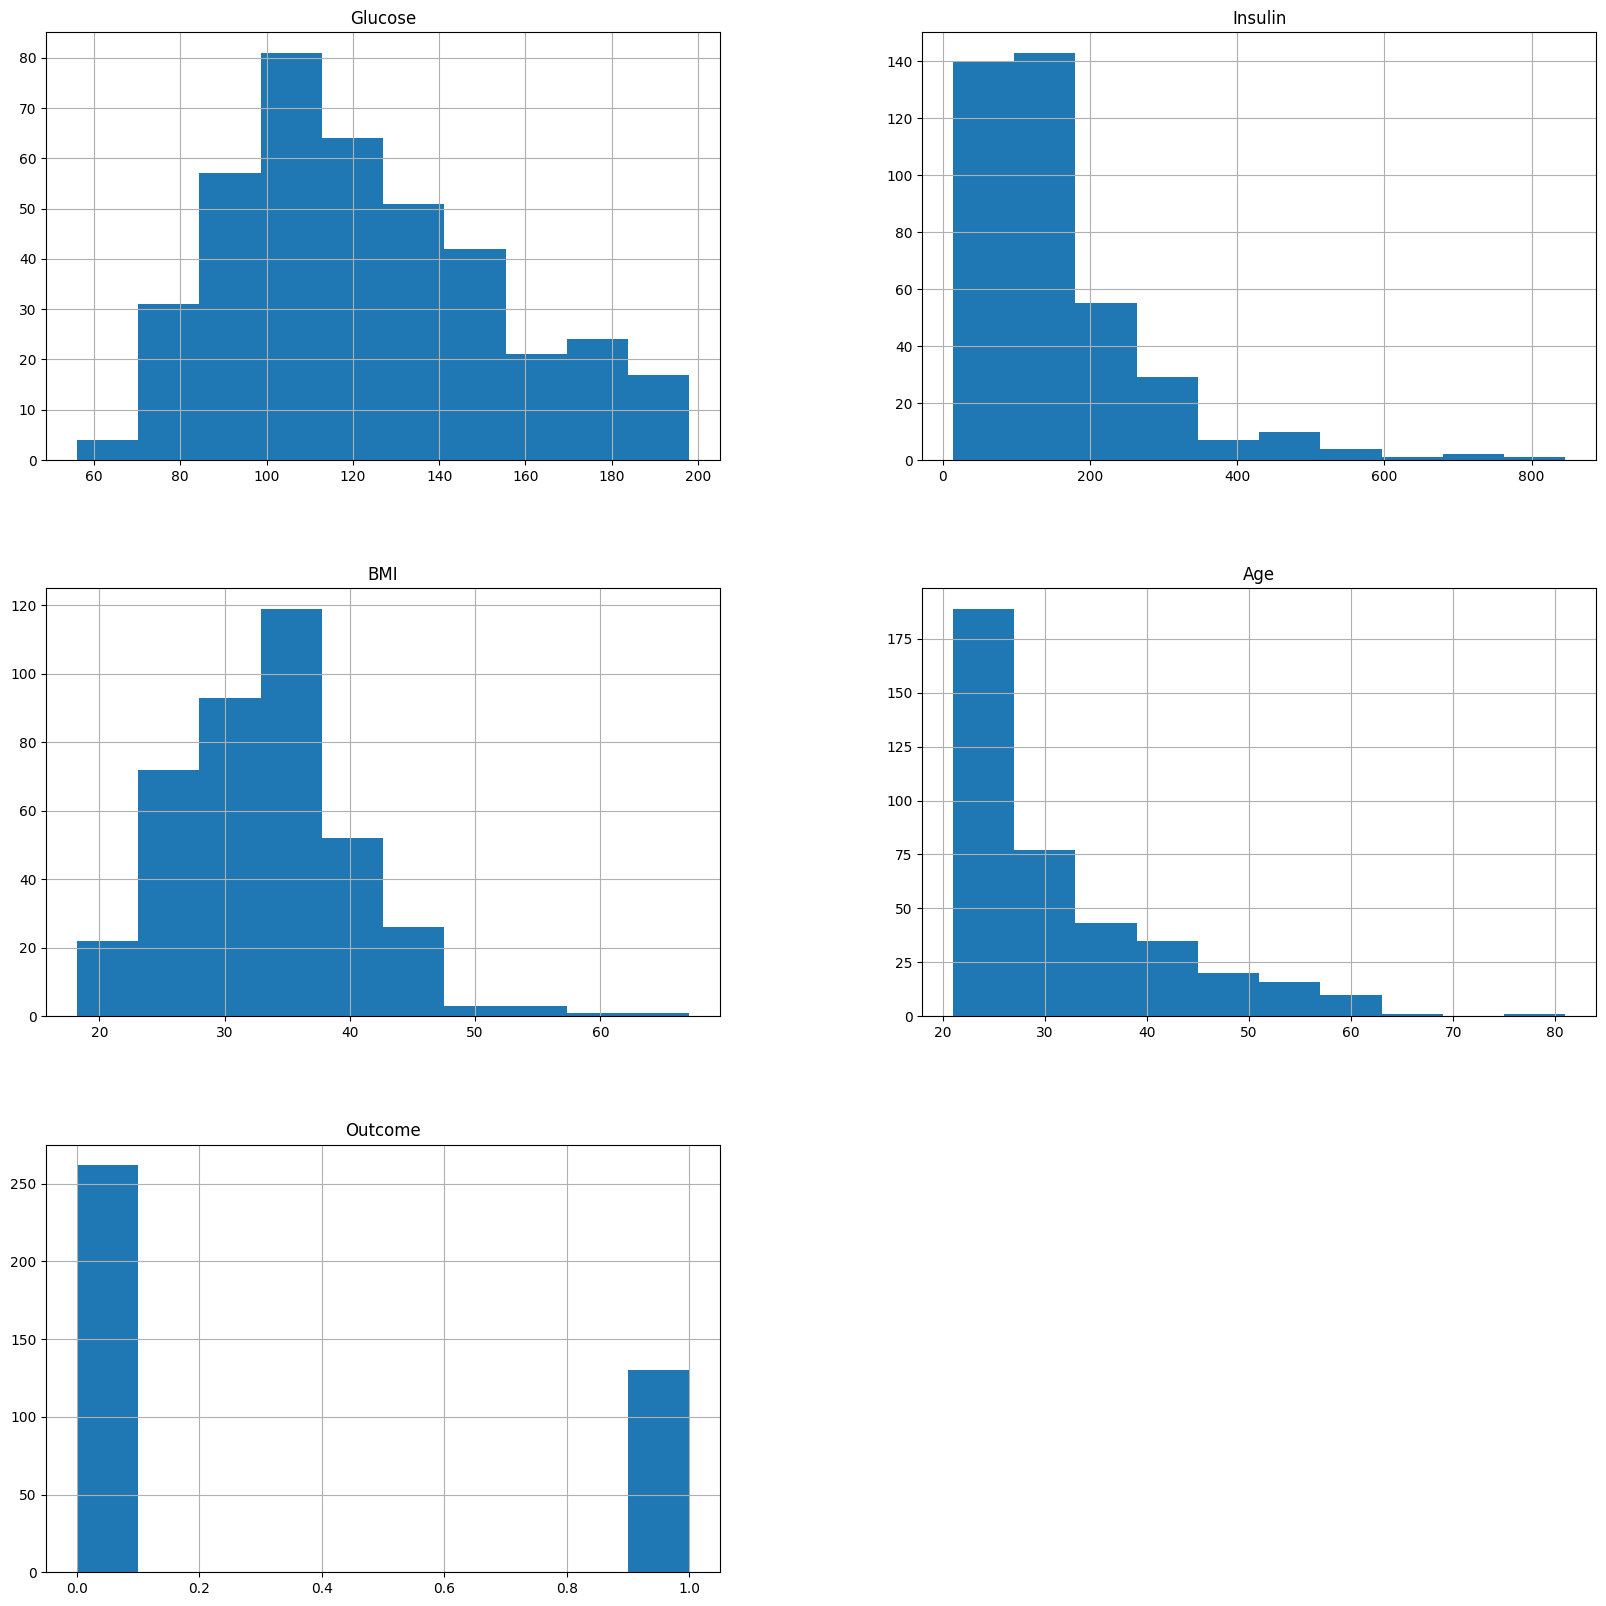

In [14]:
df_final.dropna().hist(figsize=(20, 20))

Maximum rows with NaN values correspond to `Outcome=1`. Therefore it is necessary to impute missing values.

From the histograms it can be inferred that all columns are unsymmetric. Therefore, missing values would be filled with **Median**

In [15]:
df_final['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)
df_final['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_final['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

df_final.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,125.0,33.6,50,1
1,85.0,125.0,26.6,31,0
2,183.0,125.0,23.3,32,1
3,89.0,94.0,28.1,21,0
4,137.0,168.0,43.1,33,1


In [16]:
df_final.tail()

,Glucose,Insulin,BMI,Age,Outcome
763,101.0,180.0,32.9,63,0
764,122.0,125.0,36.8,27,0
765,121.0,112.0,26.2,30,0
766,126.0,125.0,30.1,47,1
767,93.0,125.0,30.4,23,0


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

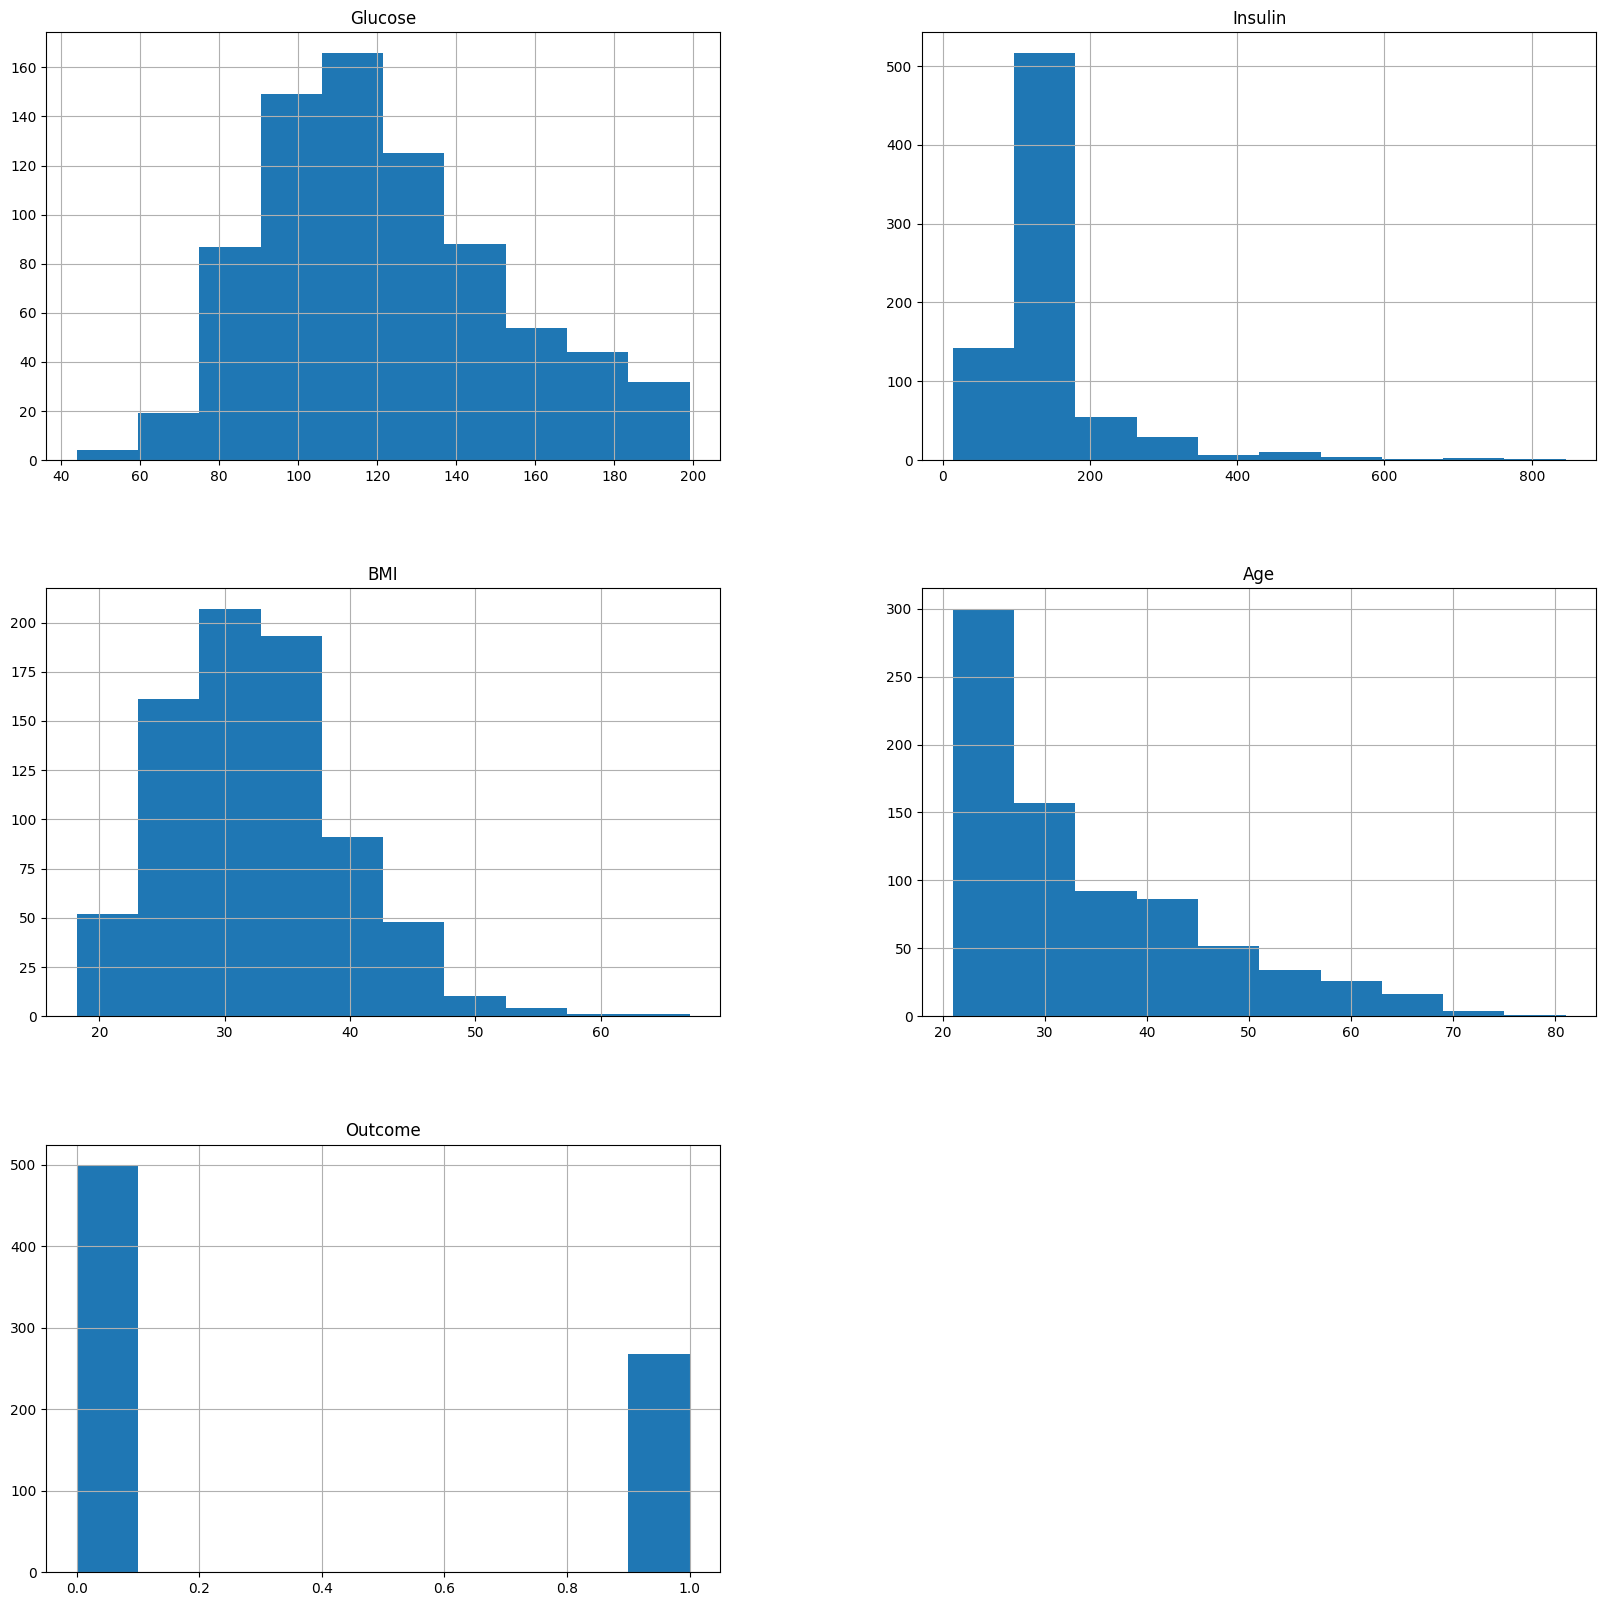

In [17]:
df_final.hist(figsize=(20, 20))

In [18]:
df_final.to_csv('data/final_data.csv', index=False)